In [113]:
#Import the Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [112]:
#Load packages 

import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from array import array

from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset.
data=pd.read_csv("Employee Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#Checking for Null Values.
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: xlabel='Age', ylabel='Density'>

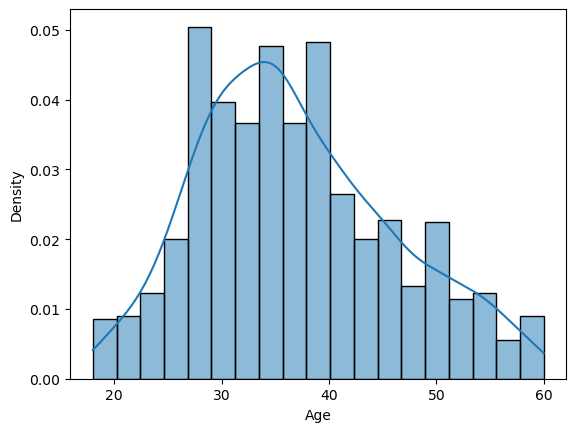

In [11]:
#Data Visualization.
sns.histplot(data["Age"], kde=True, stat="density")

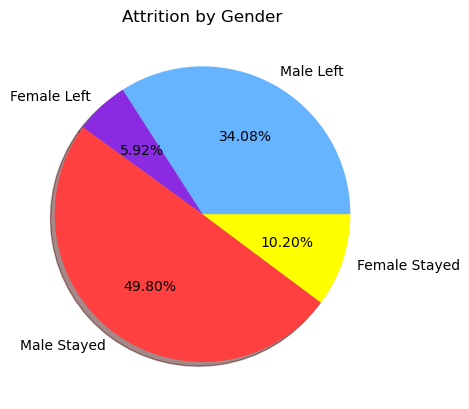

In [12]:
left_counts = data.groupby(['Gender', 'Attrition'])['Gender'].count()

plt.pie(left_counts,
       labels=['Male Left','Female Left','Male Stayed','Female Stayed'],
       colors=['#66b3ff','#8A2BE2','#FF4040','#FFFF00'],
       autopct='%1.2f%%',
       shadow=True)


plt.title('Attrition by Gender')
plt.savefig('gender_attrition.png')
plt.show()


Raito of males who stayed in company is bigger than females who stayed

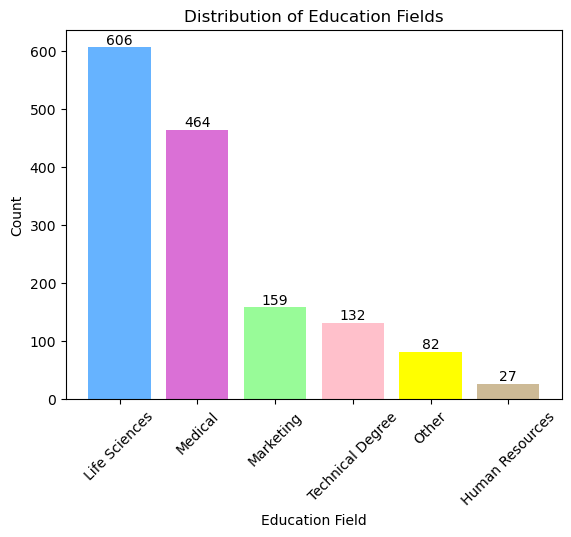

In [13]:
education_field_counts = data['EducationField'].value_counts()


x = education_field_counts.index
y = education_field_counts.values

plt.bar(x, y, color=['#66b3ff','#DA70D6','#98FB98','#FFC0CB','#FFFF00','#CDBA96'])

for i, value in enumerate(y):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.title('Distribution of Education Fields')

plt.show()

Life Sciences has an important role

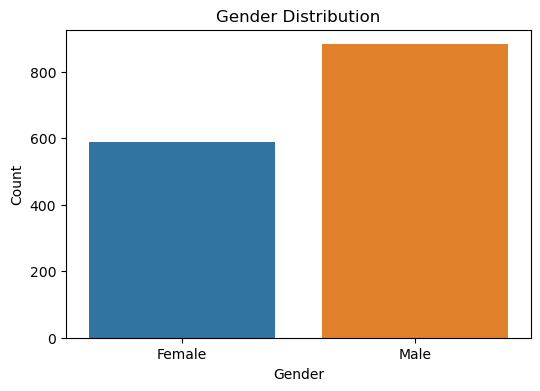

In [14]:
# Example: Bar chart of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

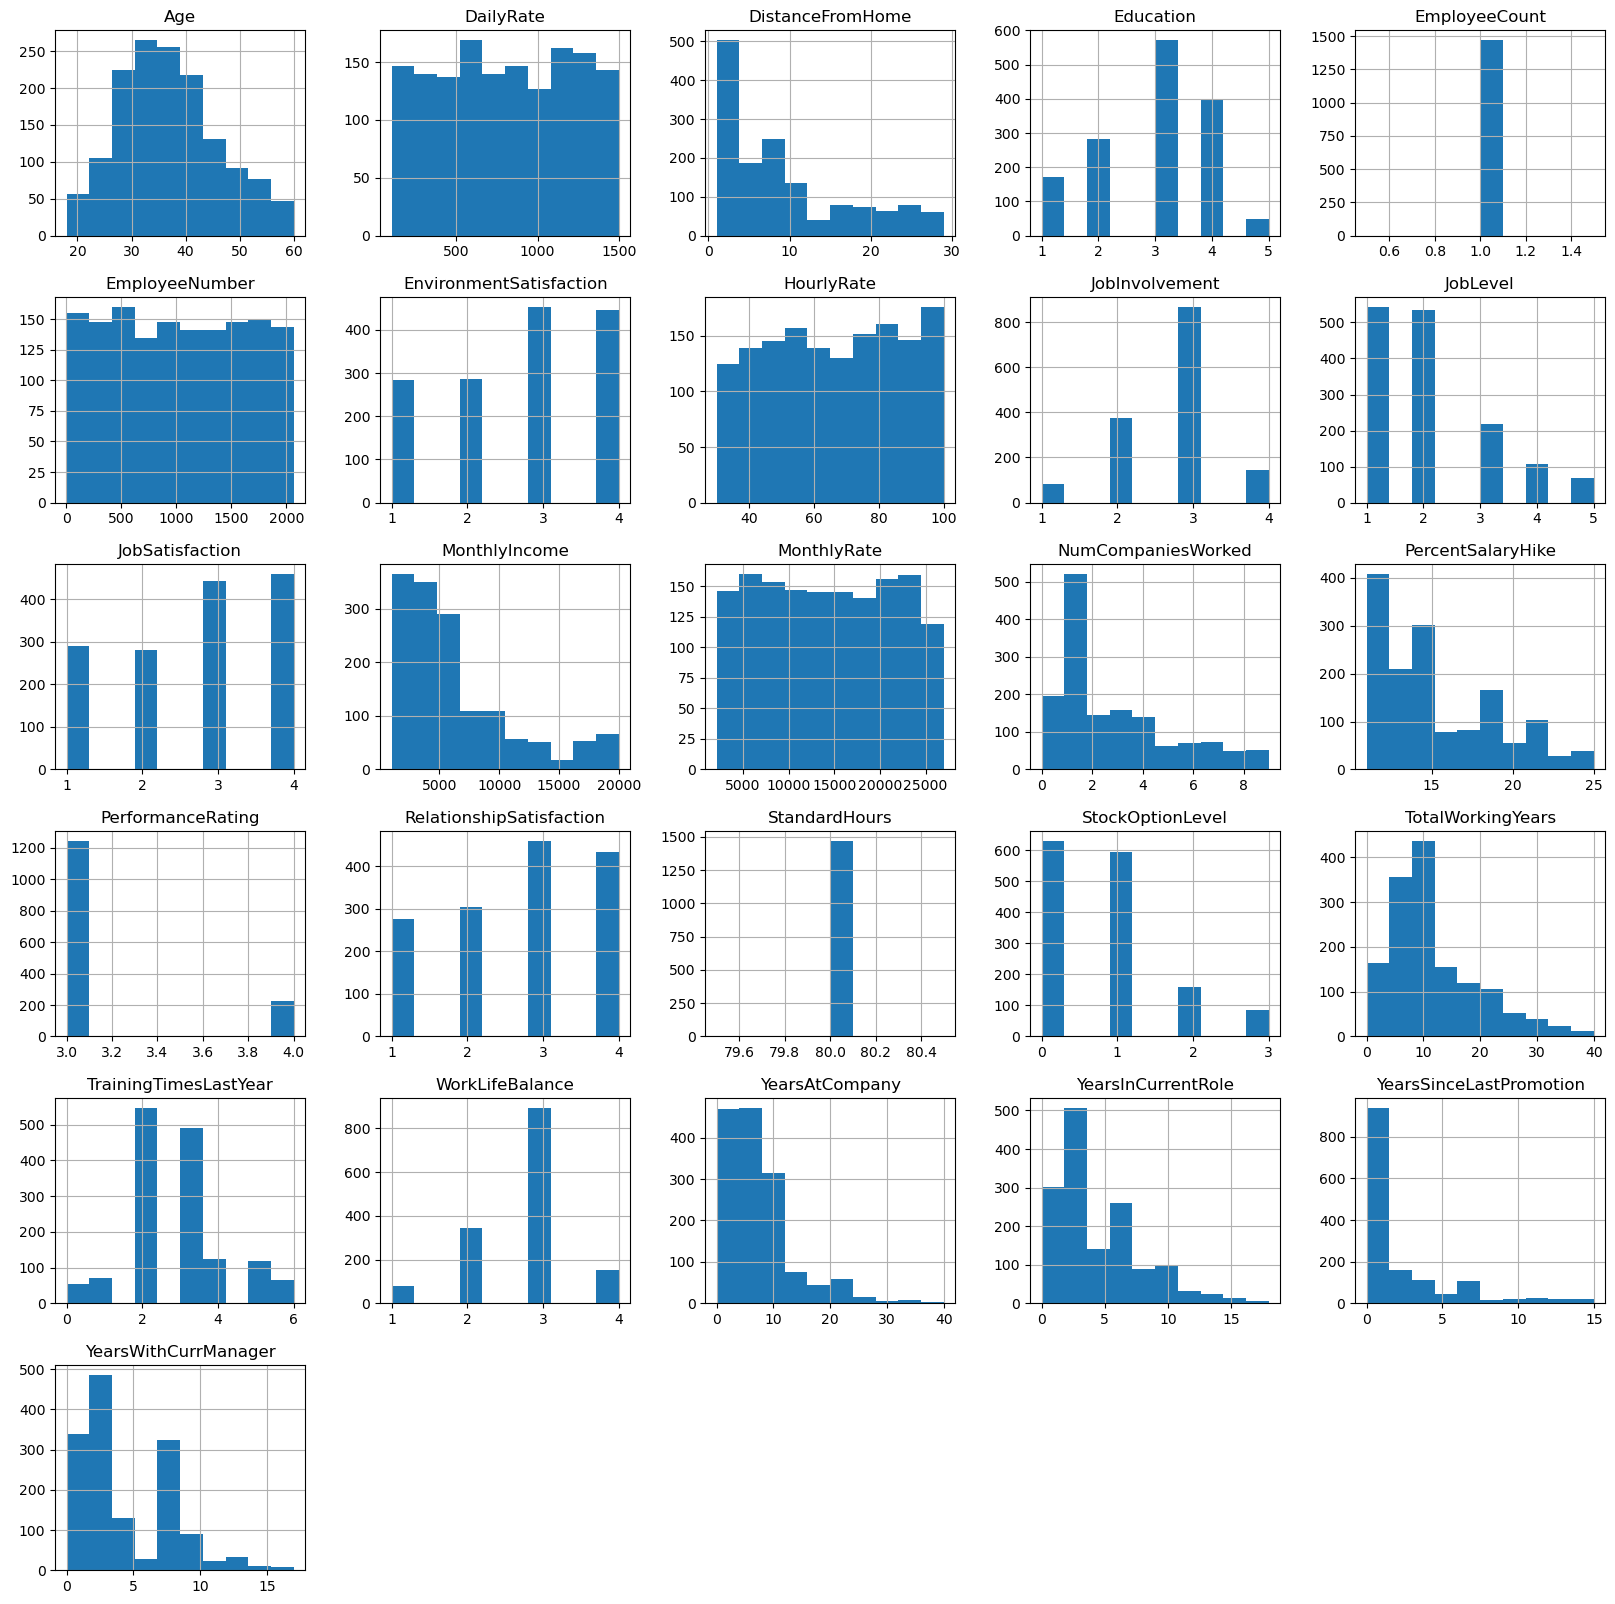

In [15]:
data.hist(figsize=(20,20))
plt.show()

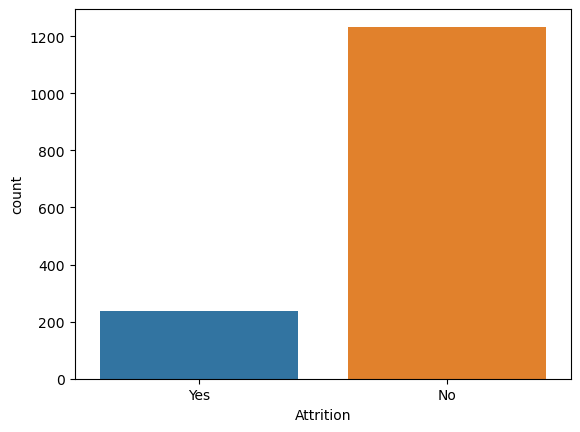

In [16]:
# Data Visualization
sns.countplot(x='Attrition', data=data)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

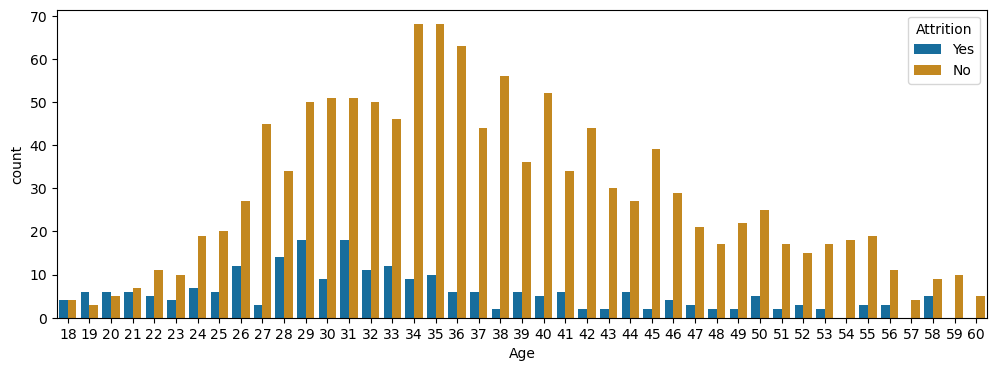

In [17]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=data, palette = 'colorblind')

In [18]:
attrition_count = pd.DataFrame(data['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


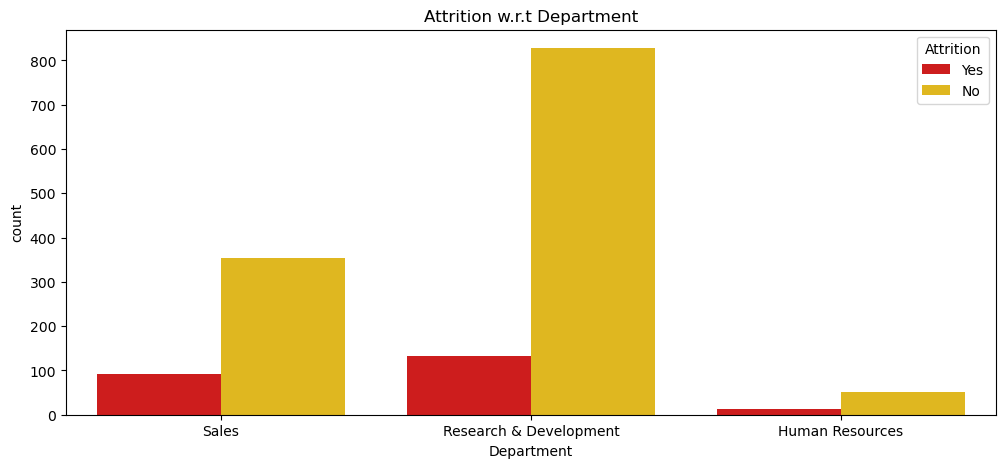

In [19]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show()

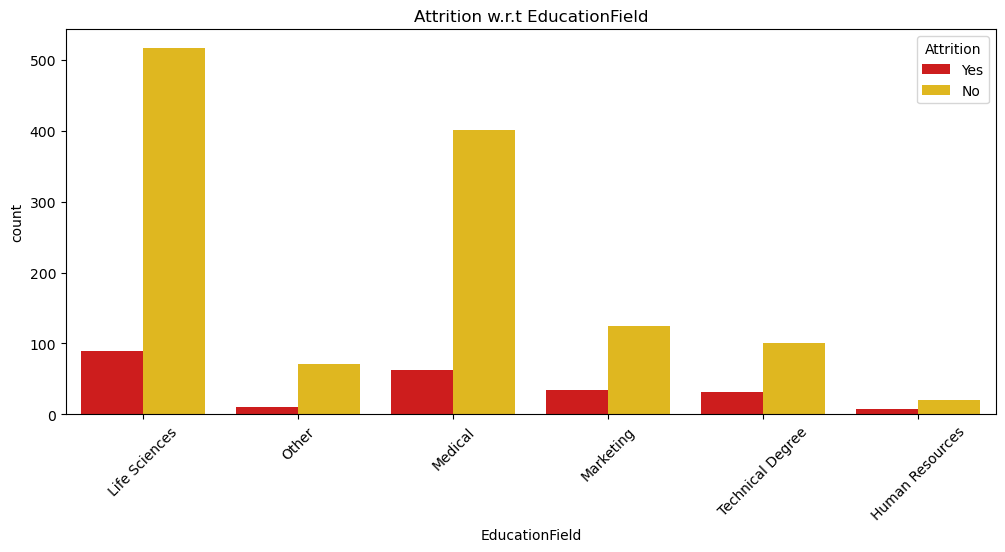

In [20]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

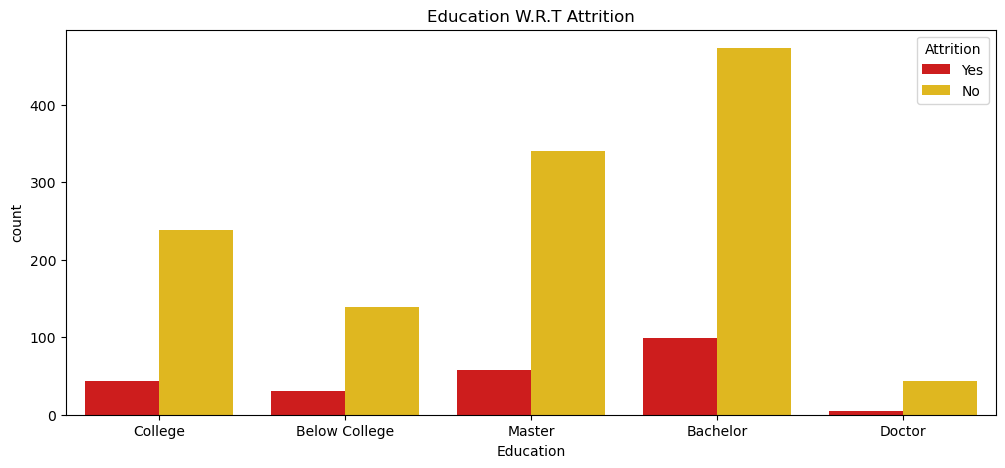

In [21]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

In [22]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


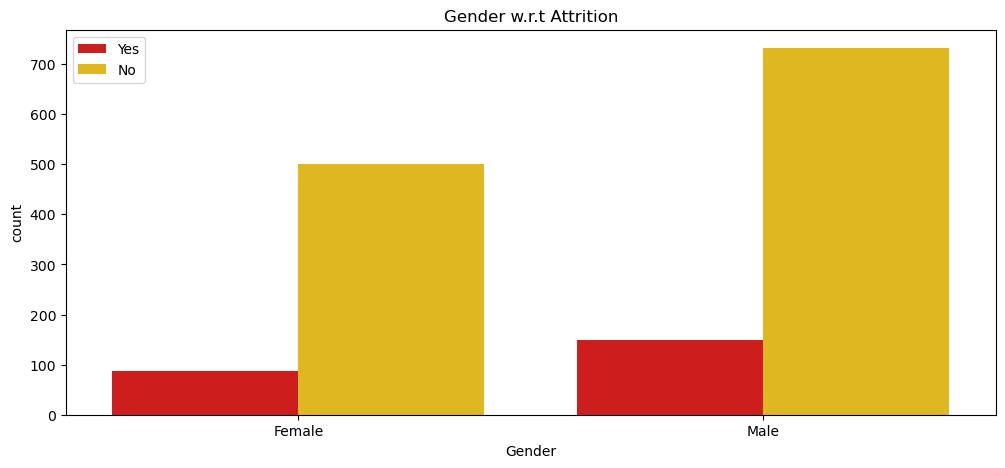

In [23]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition', data=data, palette='hot')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

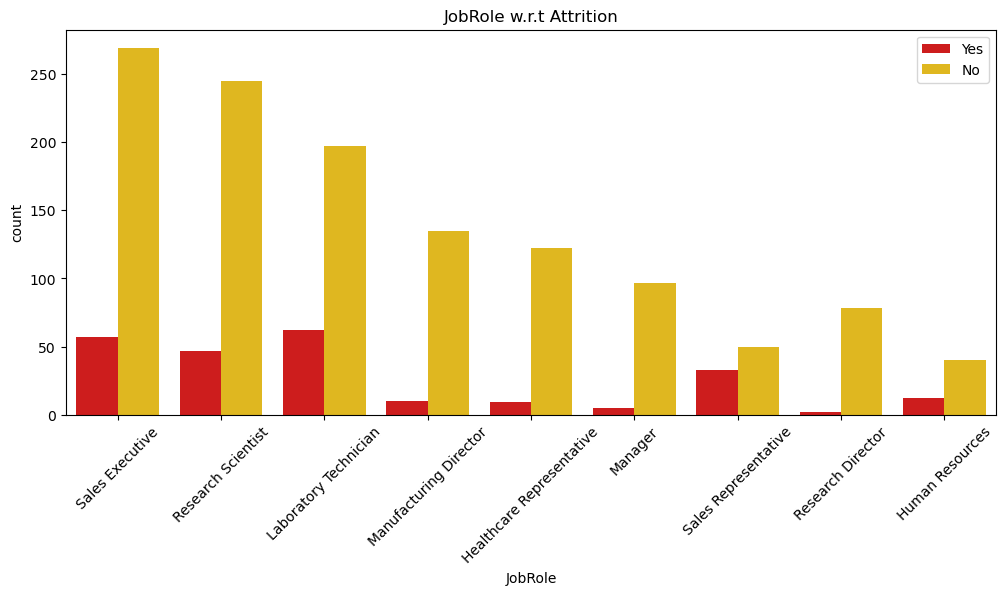

In [24]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition', data=data, palette='hot')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [25]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: >

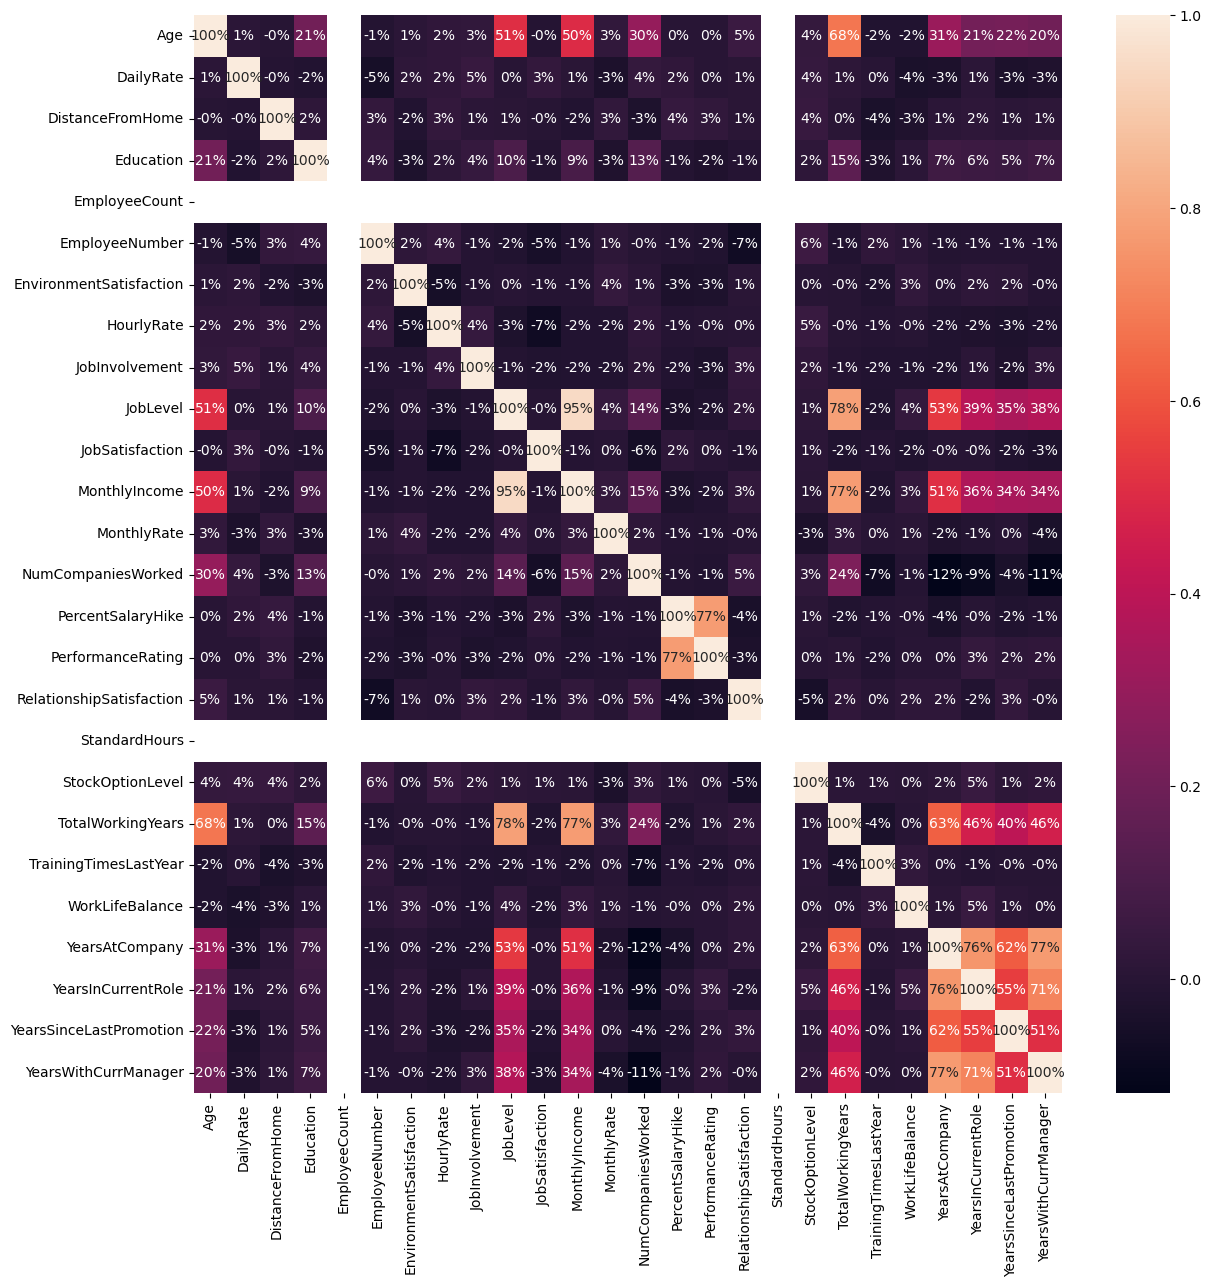

In [27]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt= '.0%')

In [77]:
categories = ['BusinessTravel','Department','Education','EducationField','Gender','MaritalStatus','OverTime', #'NumCompaniesWorked',
              'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','NumCompaniesWorked',
              'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
categorical = data[categories].astype('object')
categorical = pd.get_dummies(data[categories], drop_first = True)

In [73]:


# Define the features (X) and target (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [79]:
no_use = ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']
continuous = data.drop(columns= categories)
continuous = continuous.drop(columns= no_use)

X = pd.concat([categorical,continuous],axis=1)
Y = data['Attrition'].replace({'Yes': 1, 'No': 0}).values.reshape(-1,1)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_variables = list(continuous.columns)

x_train = x_train.reset_index()
del x_train['index']
x_train[continuous_variables] = pd.DataFrame(scaler.fit_transform(x_train[continuous_variables]), columns = continuous_variables)

x_test = x_test.reset_index()
del x_test['index']
x_test[continuous_variables] = pd.DataFrame(scaler.transform(x_test[continuous_variables]))

In [28]:
data = data

# LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data_dummies=pd.get_dummies(data)

In [30]:
X =  data_dummies.drop(columns=['Attrition_Yes', 'Attrition_No'])

In [31]:
y=data_dummies[['Attrition_Yes']]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_test_pred = log_reg.predict(X_test)

In [34]:
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))

Traning Model accruracy scores: 0.843
Test Model accruracy scores: 0.842


In [35]:
#testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.50      0.02      0.03        58

    accuracy                           0.84       368
   macro avg       0.67      0.51      0.47       368
weighted avg       0.79      0.84      0.78       368



In [36]:
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [37]:
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))

Traning Model accruracy scores: 0.895
Test Model accruracy scores: 0.891


In [38]:
y_test_pred = log_reg.predict(X_test)

In [39]:
#testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       310
           1       0.76      0.45      0.57        58

    accuracy                           0.89       368
   macro avg       0.83      0.71      0.75       368
weighted avg       0.88      0.89      0.88       368



In [40]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model with your training data
model.fit(X_train, y_train)

# Now you can use predict_proba to get probabilities
probability = model.predict_proba(X_test)[:, 1]


In [41]:
probability

array([0.12090872, 0.22388717, 0.22129378, 0.08758623, 0.31152288,
       0.28763081, 0.05466703, 0.10730384, 0.01497969, 0.1896113 ,
       0.01656903, 0.22002813, 0.10350456, 0.233222  , 0.03862693,
       0.14030812, 0.11033653, 0.18363343, 0.08624756, 0.26878429,
       0.26681188, 0.01521591, 0.15578583, 0.13844869, 0.41419472,
       0.10393812, 0.08549557, 0.05393466, 0.39451924, 0.14809233,
       0.03193818, 0.06311951, 0.15811807, 0.03861823, 0.10323014,
       0.06867416, 0.0517611 , 0.21714943, 0.03705975, 0.28309969,
       0.01308037, 0.07063854, 0.0113518 , 0.01820533, 0.05090939,
       0.30309359, 0.50506939, 0.04648874, 0.35929719, 0.39219977,
       0.06546199, 0.13518605, 0.11343519, 0.12696152, 0.22696799,
       0.15865629, 0.22151643, 0.12112853, 0.16517823, 0.35618489,
       0.04524505, 0.31001108, 0.07919756, 0.09315673, 0.19139095,
       0.0919154 , 0.17739817, 0.05465216, 0.1452367 , 0.22853693,
       0.0155628 , 0.24042019, 0.15554545, 0.16376752, 0.30365

In [42]:
# roc_curve
from sklearn.metrics import roc_curve

# roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probability)


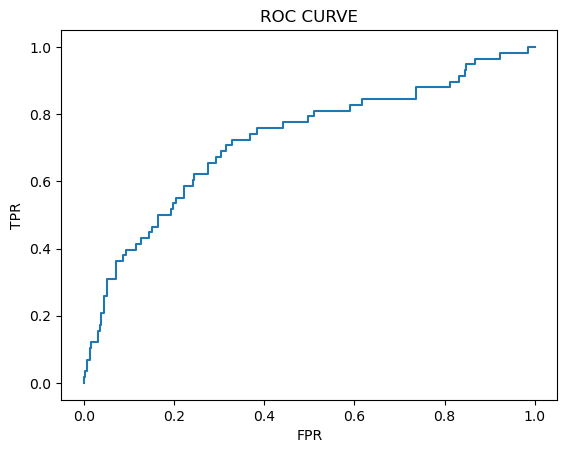

In [43]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

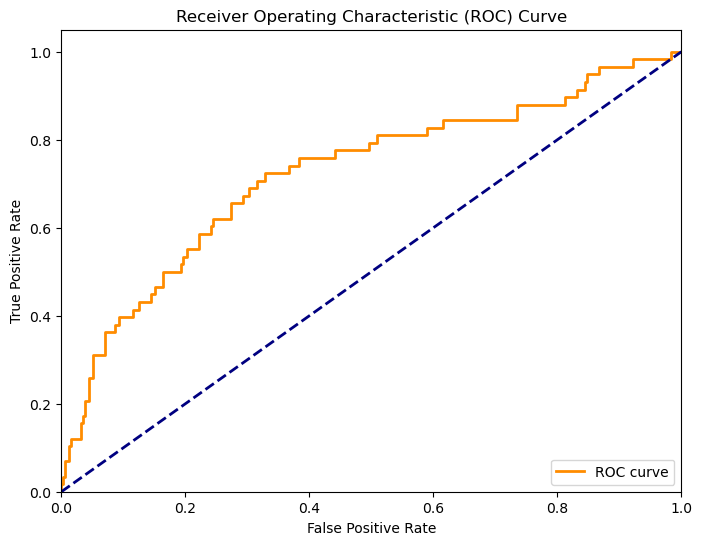

AUC: 0.72


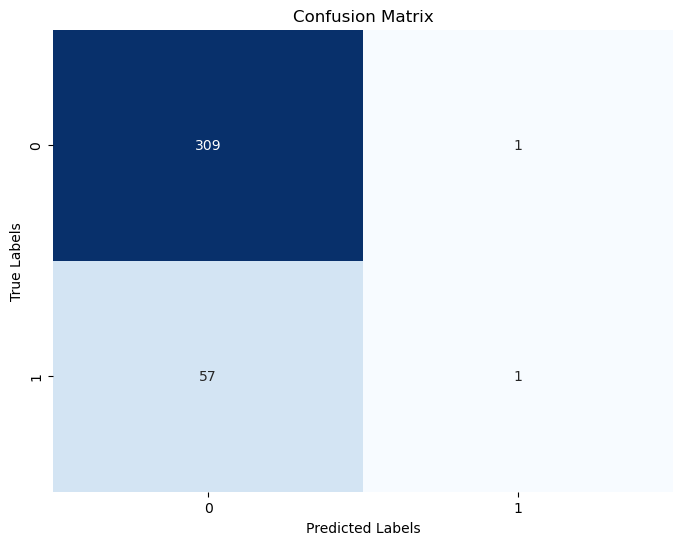

True Positives: 1
True Negatives: 309
False Positives: 1
False Negatives: 57


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1) on the test set
probability = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probability)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, probability)
print(f'AUC: {roc_auc:.2f}')

# Confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives: {tp}')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')


# Decision Trees

In [45]:
import sklearn as sk
import sklearn.tree as tree

dt = tree.DecisionTreeClassifier(max_depth=2)

In [46]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [47]:
print('Traning Model accruracy scores: {:.3f}'.format(dt.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(dt.score(X_test,y_test)))

Traning Model accruracy scores: 0.849
Test Model accruracy scores: 0.842


In [48]:
y_test_pred = dt.predict(X_test)

In [49]:
#testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       310
           1       0.50      0.09      0.15        58

    accuracy                           0.84       368
   macro avg       0.68      0.54      0.53       368
weighted avg       0.80      0.84      0.79       368



In [50]:
dt = tree.DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    criterion='gini'
)

In [51]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [52]:
print('Traning Model accruracy scores: {:.3f}'.format(dt.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(dt.score(X_test,y_test)))

Traning Model accruracy scores: 0.856
Test Model accruracy scores: 0.845


In [53]:
y_test_pred = dt.predict(X_test)

In [54]:
#testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       310
           1       0.56      0.09      0.15        58

    accuracy                           0.85       368
   macro avg       0.70      0.54      0.53       368
weighted avg       0.81      0.85      0.79       368



In [55]:
tree_para = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ["auto","log2",None],        #The number of features to consider when looking for the best split.
    'min_samples_split': [2,3,4,5,6],                #The minimum number of samples required to split an internal node. 
}

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
dtc = DecisionTreeClassifier(random_state=26)

dtc = GridSearchCV(estimator = dtc, scoring = 'f1', param_grid = tree_para, cv=5, n_jobs= -1)

In [57]:
dtc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=26), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='f1')

In [58]:
dtc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [59]:
y_pred = dtc.predict(x_train)
print("Accuracy rate: ", accuracy_score(y_train,y_pred))     
print("Prediction rate: ", precision_score(y_train,y_pred))
print("Recall rate: ", recall_score(y_train,y_pred))

Accuracy rate:  0.91005291005291
Prediction rate:  0.8432835820895522
Recall rate:  0.5355450236966824


In [60]:
y_result = dtc.predict(x_test)
print("Accuracy rate: ", accuracy_score(y_test,y_result))     
print("Prediction rate: ", precision_score(y_test,y_result))
print("Recall rate: ", recall_score(y_test,y_result))

Accuracy rate:  0.8367346938775511
Prediction rate:  0.5714285714285714
Recall rate:  0.3076923076923077


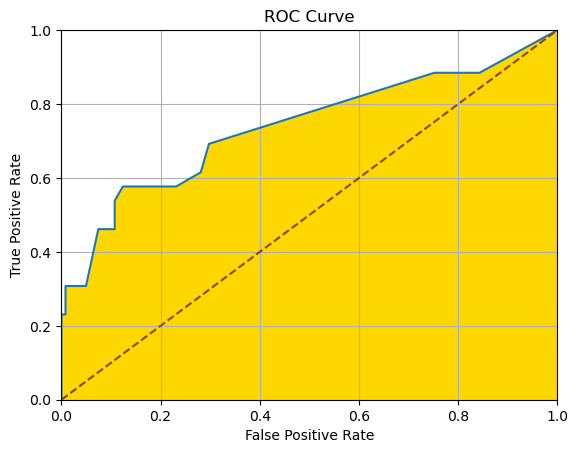

AUC: 0.7377622377622377



In [61]:
y_test_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob, pos_label=1)
plt.title('ROC Curve')
plt.plot(fpr, tpr)  
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_test_pred_prob, sample_weight=None, max_fpr=None)
print('AUC:', auc)
print()

# RandomForestClassifier

In [62]:
param_grid = {
    'max_depth': [2,3,4,6,8],                      #The maximum depth of the tree. 
    'max_features': ["auto","log2",None],        #The number of features to consider when looking for the best split.
    'min_samples_leaf': [1,2,3,4,5],                 #The minimum number of samples required to be at a leaf node. 
    'min_samples_split': [2,3,4,5,6],                #The minimum number of samples required to split an internal node. 
    'n_estimators': [5,10,20,50,100,200]              #The number of trees in the forest.
}

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
hprf = RandomForestClassifier(random_state=26)
hprf = GridSearchCV(estimator = hprf, scoring='f1', param_grid = param_grid, n_jobs = -1, verbose = 2, cv=5)

In [89]:
pred=model.predict(x_test)

In [64]:
hprf.fit(x_train, y_train)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [5, 10, 20, 50, 100, 200]},
             scoring='f1', verbose=2)

In [65]:
hprf.best_params_

{'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 5}

In [66]:
y_pred = hprf.predict(x_train)
print("Accuracy rate: ", accuracy_score(y_train, y_pred))     
print("Prediction rate: ", precision_score(y_train, y_pred))
print("Recall rate: ", recall_score(y_train, y_pred))


Accuracy rate:  0.91005291005291
Prediction rate:  0.8709677419354839
Recall rate:  0.5118483412322274


In [67]:
y_result = hprf.predict(x_test)
print("Accuracy rate: ", accuracy_score(y_test, y_result))     
print("Prediction rate: ", precision_score(y_test, y_result))
print("Recall rate: ", recall_score(y_test, y_result))


Accuracy rate:  0.8163265306122449
Prediction rate:  0.42857142857142855
Recall rate:  0.11538461538461539


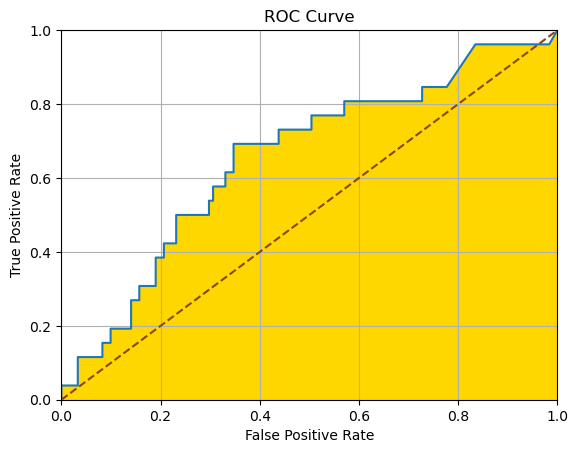

AUC: 0.6533693579148124



In [68]:
y_test_pred_prob_hp_t = hprf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_hp_t, pos_label=1)
plt.title('ROC Curve')
plt.plot(fpr, tpr)  
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_test_pred_prob_hp_t, sample_weight=None, max_fpr=None)
print('AUC:', auc)
print()

In [90]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [92]:
y_test

1041     No
184      No
1222    Yes
67       No
220      No
       ... 
1047     No
331      No
323     Yes
654      No
1110    Yes
Name: Attrition, Length: 441, dtype: object

In [108]:
y = data.iloc[:, 1]
X = data

X.drop('Attrition',
axis = 1,
inplace = True)


In [116]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)


In [118]:
import pandas as pd

# Assuming you've already created the dummy variables (dum_BusinessTravel, dum_Department, etc.)

# Adding these dummy variables to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
              dum_EducationField, dum_Gender, dum_JobRole,
              dum_MaritalStatus, dum_OverTime], axis=1)

# Removing the original categorical columns
X.drop(['BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis=1, inplace=True)

print(X.shape)
print(y.shape)


(1470, 49)
(1470,)


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

X, y, test_size = 0.25, random_state = 40)


In [121]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,
criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train,
X_test, y_test,
train=True):

if train:
print("Train Result:")
print("------------")
print("Classification Report: \n {}\n".format(classification_report(
y_train, clf.predict(X_train))))

print("Confusion Matrix: \n {}\n".format(confusion_matrix(
y_train, clf.predict(X_train))))

res = cross_val_score(clf, X_train, y_train,
cv=10, scoring='accuracy')

print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
print("----------------------------------------------------------")

elif train == False:

print("Test Result:")
print("-----------")
print("Classification Report: \n {}\n".format(
classification_report(y_test, clf.predict(X_test))))

print("Confusion Matrix: \n {}\n".format(
confusion_matrix(y_test, clf.predict(X_test))))

print("accuracy score: {0:.4f}\n".format(
accuracy_score(y_test, clf.predict(X_test))))

print("-----------------------------------------------------------")

print_score(rf, X_train, y_train,
X_test, y_test,
train=True)

print_score(rf, X_train, y_train,
X_test, y_test,
train=False)


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       922
           1       1.00      0.91      0.95       180

    accuracy                           0.98      1102
   macro avg       0.99      0.95      0.97      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 17 163]]

Average Accuracy: 	 0.8503
Accuracy SD: 		 0.0111
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       0.92      0.19      0.32        57

    accuracy                           0.87       368
   macro avg       0.89      0.59      0.62       368
weighted avg       0.88      0.87      0.83       368


Confusion Matrix: 
 [[310   1]
 [ 46  11]]

accuracy score: 0.8723

---------------------

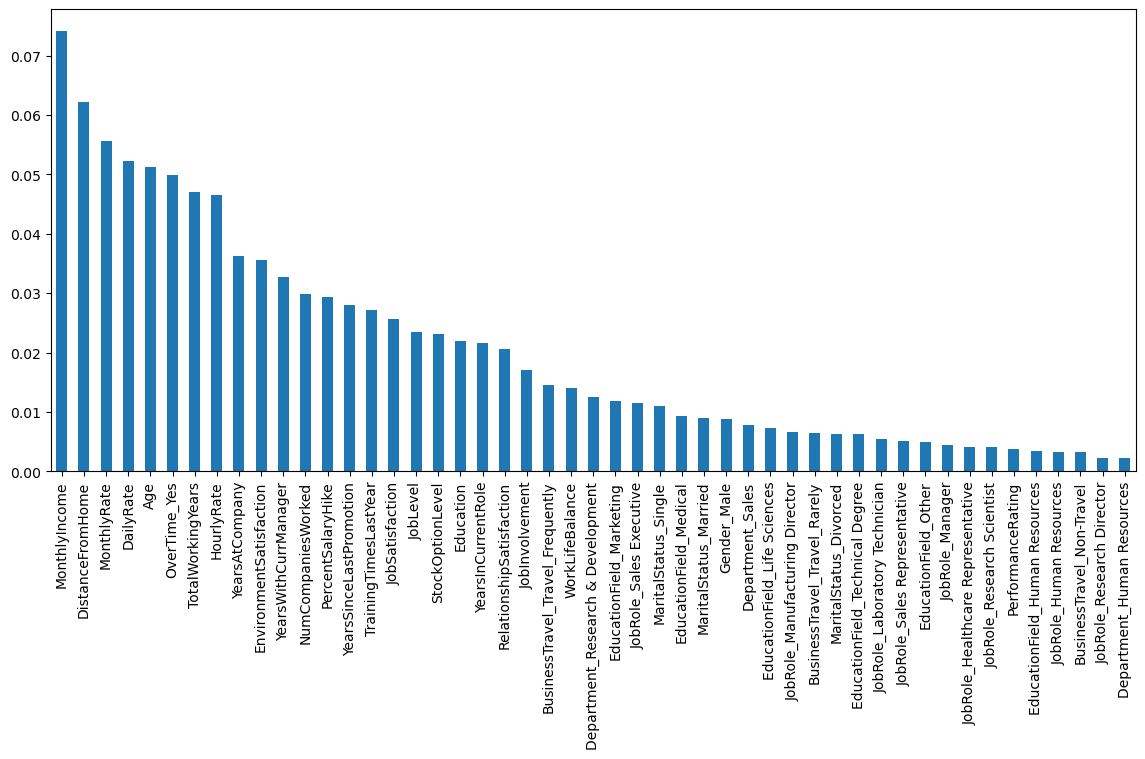

In [122]:
pd.Series(rf.feature_importances_,
index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
figsize = (14,6));


# 21bce8168 Teja Sri Vasireddy